# Part II - Presentation of the Analysis of CoGo Bike Sharing Sytem Data
## by Ahlam Mustapha

## Investigation Overview


> This presentation is about deriving insights from a bicycle sharing platform data. The data contain information about tripduration and other important features that can be investigated for valuable insights. The main insights I will be sharing are detailed in this presentation 

## Dataset Overview

> The dataset contains a total of 16,868 bicycle rides from CoGo for the entire year of 2019 with 11 features namely trip_id, start_time, end_time, tripduration, from_station_name, to_station_name, usertype, gender, birthyear, start_date, and end_date. 

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
#importing all the datasets for the 2019 cogo trip data
godata1 = pd.read_csv('201901-cogo-tripdata.csv')
godata2 = pd.read_csv('201902-cogo-tripdata.csv')
godata3 = pd.read_csv('201903-cogo-tripdata.csv')
godata4 = pd.read_csv('201904-cogo-tripdata.csv')
godata5 = pd.read_csv('201905-cogo-tripdata.csv')
godata6 = pd.read_csv('201906-cogo-tripdata')
godata7 = pd.read_csv('201907-cogo-tripdata')
godata8 = pd.read_csv('201908-cogo-tripdata')
godata9 = pd.read_csv('201909-cogo-tripdata.csv')
godata10 = pd.read_csv('201910-cogo-tripdata.csv')
godata11 = pd.read_csv('201911-cogo-tripdata.csv')
godata12 = pd.read_csv('201912-cogo-tripdata.csv')

In [3]:
#defining a function to clean the datasets
def cleangodata(df):
    """This function will provide the detail information about the dataset, check for missing variables and then drop them,
    and finally check for duplicates."""
    print('Summary Statistics: \n')
    print('*'*70)
    print(df.info())
    print('*'*70)
    print('Missing Values: {}'.format(df.isna().sum()))
    print('*'*70)
    print('Missing Values Dropped: {}'.format(df.dropna(inplace= True)))
    print('*'*70)
    print('Duplicate Values: {}'.format(df.duplicated().sum()))

In [4]:
cleangodata(godata1)
cleangodata(godata2)
cleangodata(godata3)
cleangodata(godata4)
cleangodata(godata5)
cleangodata(godata6)
cleangodata(godata7)
cleangodata(godata8)
cleangodata(godata9)
cleangodata(godata10)
cleangodata(godata11)
cleangodata(godata12)

Summary Statistics: 

**********************************************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 860 entries, 0 to 859
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   trip_id                860 non-null    int64  
 1   start_time             860 non-null    object 
 2   end_time               860 non-null    object 
 3   bikeid                 860 non-null    int64  
 4   tripduration           860 non-null    object 
 5   from_station_location  860 non-null    object 
 6   from_station_id        860 non-null    int64  
 7   from_station_name      860 non-null    object 
 8   to_station_location    860 non-null    object 
 9   to_station_id          860 non-null    int64  
 10  to_station_name        860 non-null    object 
 11  usertype               860 non-null    object 
 12  gender                 730 non-null    object 
 13  birthyear        

Missing Values Dropped: None
**********************************************************************
Duplicate Values: 0
Summary Statistics: 

**********************************************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5842 entries, 0 to 5841
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   trip_id                5842 non-null   int64  
 1   start_time             5842 non-null   object 
 2   end_time               5842 non-null   object 
 3   bikeid                 5842 non-null   int64  
 4   tripduration           5842 non-null   object 
 5   from_station_location  5842 non-null   object 
 6   from_station_id        5842 non-null   int64  
 7   from_station_name      5842 non-null   object 
 8   to_station_location    5842 non-null   object 
 9   to_station_id          5842 non-null   int64  
 10  to_station_name        5842 non-null   object 
 11 

In [5]:
#combining all these dataset into one master data
godata = pd.concat([godata1, godata2, godata3, godata4, godata5, godata6, godata7, godata8, godata9, godata10,
                    godata11, godata12], axis=0)

In [6]:
#changing the tripduration variable into integer datatype
godata['tripduration'] = godata.tripduration.str.replace(',', '').astype(float)
godata['tripduration'] = godata.tripduration.astype(int)

#changing the birthyear variable into integer datatype
godata['birthyear'] = godata.birthyear.astype('int')

In [7]:
#changing the start_date and start_time from object to datetime
godata['start_date'] = pd.to_datetime(godata['start_time'])
godata['start_time'] = pd.to_datetime(godata['start_time'])


#changing the end_date and end_time from object to datetime
godata['end_date'] = pd.to_datetime(godata['end_time'])
godata['end_time'] = pd.to_datetime(godata['end_time'])

In [8]:
#dropping redundant variables
godata.drop(['bikeid','from_station_location', 'from_station_id','to_station_location','to_station_id'], 
            axis=1, inplace=True)  

In [9]:
#splitting the start_date into year, month and day
godata['start_year'] = godata['start_date'].dt.year
godata['start_month'] = godata['start_date'].dt.month_name()
godata['start_day'] = godata['start_date'].dt.day_name()


#creating the age variable from the start_year and birthyear
godata['age'] = godata['start_year'] - godata['birthyear']

## Distribution of the Trip Duration of Rides

> The distribution of this variable was heavily skewed due to some outliers. Hence I scaled it using logarithmic scale and it became more normally distributed. It can be seen that most of the trip duration fell between 100 and 1000 seconds while few others fell below and above these values.

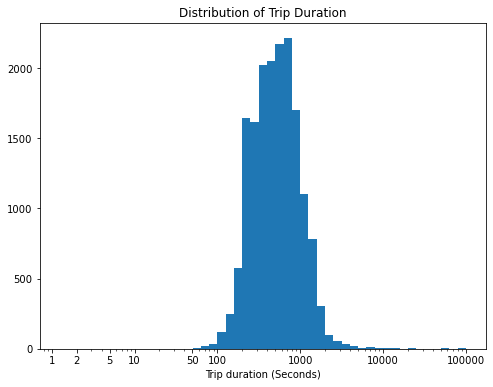

In [10]:
#scaling the distribution of the tripduration feature
bins = 10 ** np.arange(0.1, 5+0.1, 0.1)
ticks = [1, 2, 5, 10, 50, 100, 1000, 10000, 100000]
labels = ['{}'.format(val) for val in ticks]

plt.figure(figsize=[8, 6])
plt.hist(data = godata, x = 'tripduration', bins = bins)
plt.title('Distribution of Trip Duration')
plt.xscale('log')
plt.xticks(ticks, labels)
plt.xlabel('Trip duration (Seconds)');

## Most Favourite Station

> I wanted to find out which station among all the start stations was popular and most used. Hence I plotted a bar chart of all stations with the station with the highest frequency count being ranked first in that order till the least used station. Front St & Town St came first with a total frequency of 7.7%. 

In [11]:
#returns the sum of all not-null values in `from_station_name` column
n_godata = godata['from_station_name'].value_counts().sum()
from_station_name_counts = godata['from_station_name'].value_counts()


#return the highest frequency in the `from_station_name` column
maxnum_from_station_name = from_station_name_counts[0]
#compute the length of the longest bar in terms of the proportion
max_prop = maxnum_from_station_name / n_godata
print(max_prop)

0.07677258714726108


In [12]:
base_color = sb.color_palette()[0] #using a selected color from the color palette for the bars
def barchartedit(var, color):
    from_station_name_order = godata['from_station_name'].value_counts().index  #ordering the bars in descending order
    
    #Which of the start station names is the most popular?
    plt.figure(figsize=[12, 15])
    sb.countplot(data=godata, y='from_station_name', color= base_color, order=from_station_name_order)
    plt.title('Most Favourite Station Name')
    # Logic to print the proportion text on the bars
    for i in range (from_station_name_counts.shape[0]):
        #from_station_name_counts contains the frequency of unique values in the `from_station_name` column in decreasing 
        #order.
        count = from_station_name_counts[i]
        # Convert count into a percentage, and then into string
        pct_string = '{:0.1f}%'.format(100*count/n_godata)
        # Print the string value on the bar. 
        plt.text(count+1, i, pct_string, va='center')

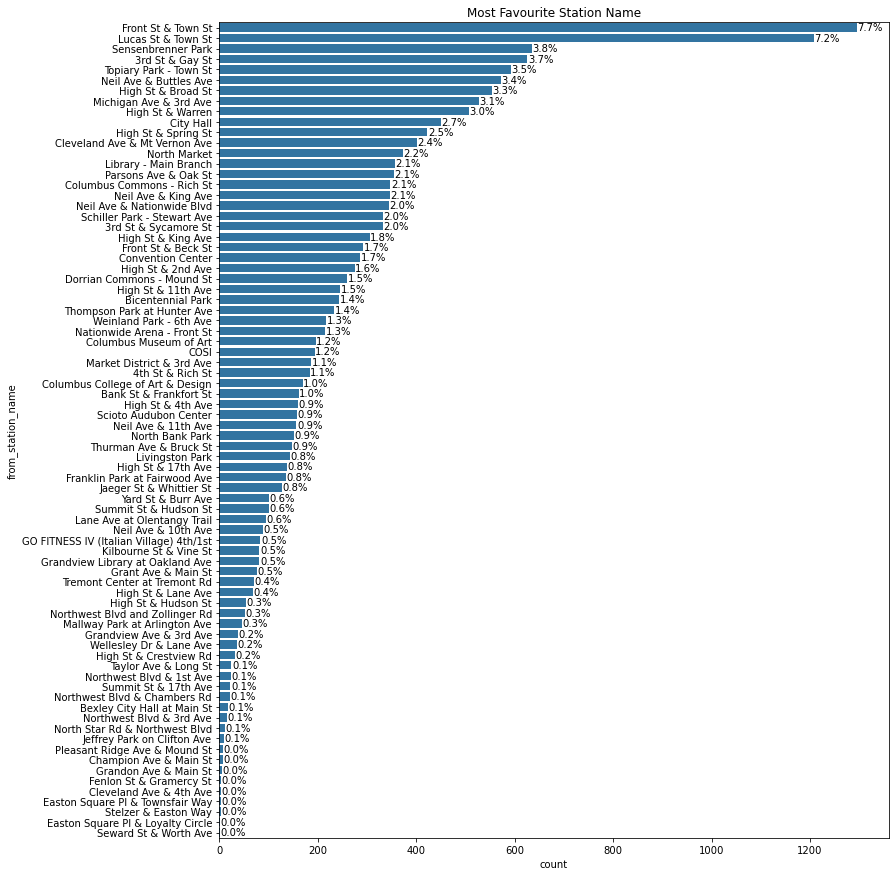

In [13]:
barchartedit('from_station_name', 'color')

## Birth Year Vs. Trip Duration

>I wanted to know if there will be any relationship between birth year and trip duration. Upon investigation, I realised that there was no clear relationship between these two variables hence they seemed independent of each other. 

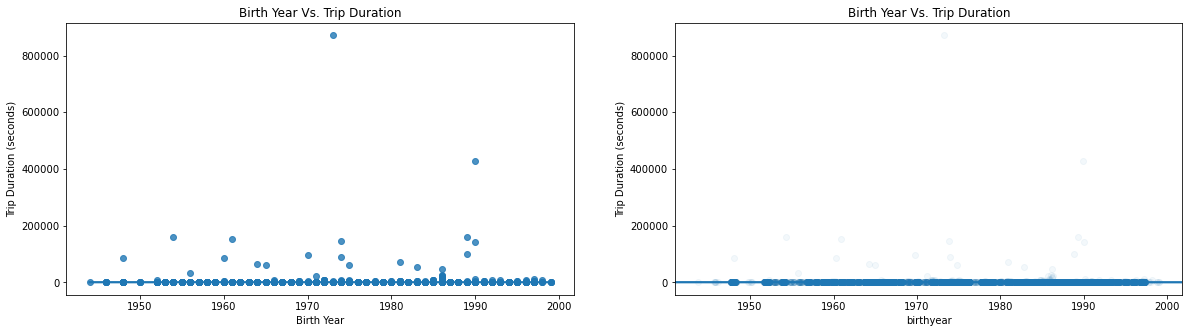

In [14]:
#is there any relationship between the birth year of riders and their trip durations?
# Scatter plot
plt.figure(figsize = [20, 5])
#the first plot shows the scatter plot between birthyear and tripduration
plt.subplot(1, 2, 1)
sb.regplot(data = godata, x = 'birthyear', y = 'tripduration')
plt.title('Birth Year Vs. Trip Duration')
plt.xlabel('Birth Year')
plt.ylabel('Trip Duration (seconds)');

#the second plot shows the same scatter plot but with some transformations using jittering and transparency options
plt.subplot(1, 2, 2)
sb.regplot(data = godata, x = 'birthyear', y = 'tripduration', truncate=False, x_jitter=0.3, scatter_kws={'alpha':1/20})
plt.title('Birth Year Vs. Trip Duration')
plt.ylabel('Trip Duration (seconds)');

## Trip Duration by Age and Usertype of Riders

>Adding a third variable to this plot showed some key insight. It can be seen that the 'customer' usertype have low trip durations and their ages are between 20 and 60 years old. 

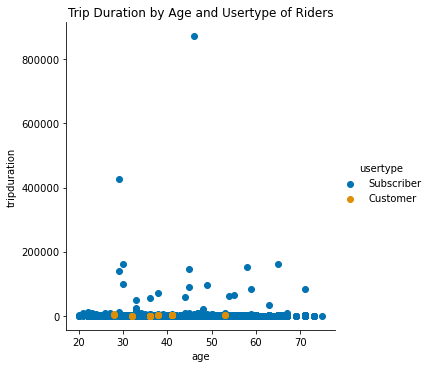

In [15]:
g = sb.FacetGrid(data = godata, hue = 'usertype', height = 5, palette = 'colorblind')
g.map(plt.scatter, 'age', 'tripduration')
plt.title('Trip Duration by Age and Usertype of Riders')
g.add_legend();

## Age of Riders across Months and Usertype
>The majority of the 'subscribers' seem to be in their 40's. The larger error bars shows the fewer 'customers' during each month of the year. The majority of the 'customers' seem to be concentrated around May and June and their ages are below 40 years old.

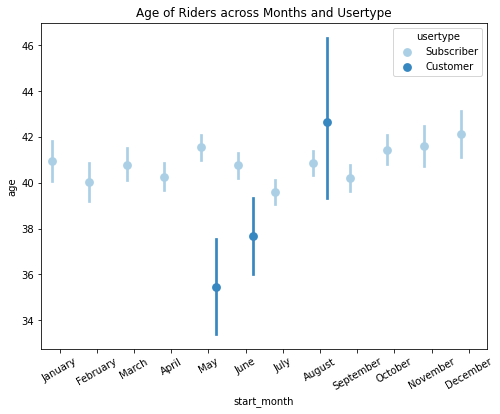

In [16]:
fig = plt.figure(figsize = [8,6])
ax = sb.pointplot(data = godata, x = 'start_month', y = 'age', hue = 'usertype',
           palette = 'Blues', linestyles = '', dodge = 0.4)
plt.title('Age of Riders across Months and Usertype')
plt.xticks(rotation=30)
plt.show();

In [17]:
!jupyter nbconvert Part_II_slide_deck.ipynb --to slides --post serve --no-input --no-prompt

[NbConvertApp] Converting notebook Part_II_slide_deck.ipynb to slides
[NbConvertApp] Writing 855928 bytes to Part_II_slide_deck.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Traceback (most recent call last):
  File "C:\Users\HP PAVILION\anaconda3\Scripts\jupyter-nbconvert-script.py", line 10, in <module>
    sys.exit(main())
  File "C:\Users\HP PAVILION\anaconda3\lib\site-packages\jupyter_core\application.py", line 269, in launch_instance
    return super().launch_instance(argv=argv, **kwargs)
  File "C:\Users\HP PAVILION\anaconda3\lib\site-packages\traitlets\config\application.py", line 846, in launch_instance
    app.start()
  File "C:\Users\HP PAVILION\anaconda3\lib\site-packages\nbconvert\nbconvertapp.py", line 369, in start
    self.convert_notebooks()
  File "C:\Users\HP PAVILION\anaconda3\lib\site-packages\nbconvert\nbconvertapp.py", line 541, in convert_notebooks
    self.convert_single_notebook(notebook_fil